The late_shipments dataset contains supply chain data on the delivery of medical supplies. Each row represents one delivery of a part. The late columns denotes whether or not the part was delivered late. A value of "Yes" means that the part was delivered late, and a value of "No" means the part was delivered on time.

Point estimate (or sample statistic), is the proportion of late shipments.







> We hypothesize that proportion of late shipments is 6%






In [ ]:
import pandas as pd


# Load the Feather file
# feather_file_path = 'path/to/your/feather/file.feather'
df = pd.read_feather('late_shipments.feather')

# Save as CSV file
df.to_csv('late_shipments.csv', index=False)



In [ ]:
import pandas as pd
df1=pd.read_csv('late_shipments.csv')

In [ ]:
df1.head()

,id,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,late_delivery,late,product_group,sub_classification,...,line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_kilograms,freight_cost_usd,freight_cost_groups,line_item_insurance_usd
0,36203.0,Nigeria,PMO - US,Direct Drop,EXW,Air,1.0,Yes,HRDT,HIV test,...,2996.0,266644.00,89.00,0.89,"Alere Medical Co., Ltd.",Yes,1426.0,33279.83,expensive,373.83
1,30998.0,Botswana,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test,...,25.0,800.00,32.00,1.60,"Trinity Biotech, Plc",Yes,10.0,559.89,reasonable,1.72
2,69871.0,Vietnam,PMO - US,Direct Drop,EXW,Air,0.0,No,ARV,Adult,...,22925.0,110040.00,4.80,0.08,Hetero Unit III Hyderabad IN,Yes,3723.0,19056.13,expensive,181.57
3,17648.0,South Africa,PMO - US,Direct Drop,DDP,Ocean,0.0,No,ARV,Adult,...,152535.0,361507.95,2.37,0.04,"Aurobindo Unit III, India",Yes,7698.0,11372.23,expensive,779.41
4,5647.0,Uganda,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test - Ancillary,...,850.0,8.50,0.01,0.00,Inverness Japan,Yes,56.0,360.00,reasonable,0.01


In [ ]:
df1.shape

(1000, 27)

In [ ]:
df1.columns

Index(['id', 'country', 'managed_by', 'fulfill_via', 'vendor_inco_term',
       'shipment_mode', 'late_delivery', 'late', 'product_group',
       'sub_classification', 'vendor', 'item_description',
       'molecule_test_type', 'brand', 'dosage', 'dosage_form',
       'unit_of_measure_per_pack', 'line_item_quantity', 'line_item_value',
       'pack_price', 'unit_price', 'manufacturing_site',
       'first_line_designation', 'weight_kilograms', 'freight_cost_usd',
       'freight_cost_groups', 'line_item_insurance_usd'],
      dtype='object')

In [ ]:
# proportion of shipments that are late where column late has Yes
late_prop_samp = (df['late'] == 'Yes').mean()
late_prop_samp

0.061

In [ ]:
# The proportion of late shipments in the sample is 6.1%

In [ ]:
# We do a bootstrap sampling or distribution for the late column
# that is, we see in all of the 5000 iterations, what is the proportion of Yes
# And how is Yes distributed and how many times Yes proportion is 6%


In [ ]:
# bootstrap distribution
import numpy as np
late_shipments_boot_distn=[]
for i in range(5000):
    late_shipments_boot_distn.append(
      np.mean(
          df1.sample(frac=1,replace=True)['late']=='Yes'
      )
  )

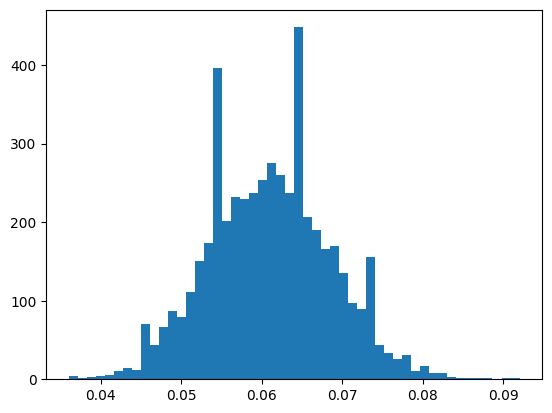

In [ ]:
import matplotlib.pyplot as plt
plt.hist(late_shipments_boot_distn,bins=50)
plt.show()

In [ ]:
# Hypothesize that the proportion is 6%
late_prop_hyp = 0.06

In [ ]:
# Calculate the standard error
std_error = np.std(late_shipments_boot_distn)


In [ ]:
# z score tells us how much difference is there between sample statistic and expected value or hypotesized statistic

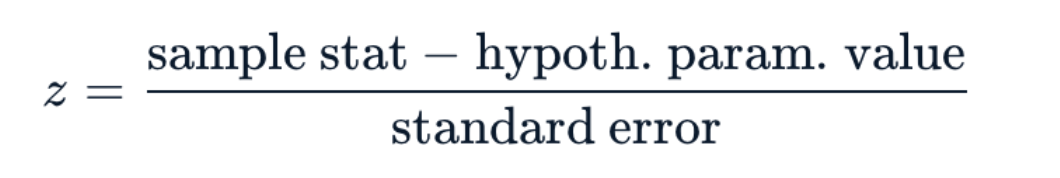

In [ ]:
# Find z-score of late_prop_samp
z_score = (late_prop_samp-late_prop_hyp)/std_error

# Print z_score
print(z_score)

0.13098625581807016


In [ ]:
# We use right tailed test here because late_prop_hyp<late_prop_samp

In [ ]:
# calculating p value
from scipy.stats import norm
p_value=1-norm.cdf(z_score,loc=0,scale=1)
p_value

0.4478930899958684

In [ ]:
# Set significance level (alpha) before hand
alpha = 0.05

In [ ]:
# there is a lot of support for H0 based on p value but we need to find the significance level

In [ ]:
# if p<=alpha means we reject H0
# otherwise we fail to reject H0


In [ ]:
p_value<=alpha

False

In [ ]:
# Therefore we fail to reject H0
# The proportion of late shipments is avtually 6%

In [ ]:
# We can also check this with 95% confidence interval

lower=np.quantile(late_shipments_boot_distn,0.025)
upper=np.quantile(late_shipments_boot_distn,0.975)
print((lower,upper))

(0.047, 0.076)


In [ ]:
# We see that 0.06 lies in the range of (0.047, 0.076) and this further confirms that H0 is true

In [ ]:
# Why are 6% shipments late? Is weight associated to it?
# Claim: weight more , shipment late. Weight less, shipment not late

In [ ]:
# H0: The mean weight of shipments that weren't late is the same as the mean weight of shipments that were late.

# Ha: The mean weight of shipments that weren't late is less than the mean weight of shipments that were late.

In [ ]:
xbar_sample_mean=df1.groupby('late')['weight_kilograms'].mean()
xbar_sample_mean

late
No     1897.791267
Yes    2715.672131
Name: weight_kilograms, dtype: float64

In [ ]:
s=df1.groupby('late')['weight_kilograms'].std()
s
# s is std dev

late
No     3154.039507
Yes    2544.688211
Name: weight_kilograms, dtype: float64

In [ ]:
n=df1.groupby('late')['weight_kilograms'].count()
n

late
No     939
Yes     61
Name: weight_kilograms, dtype: int64

In [ ]:
import numpy as np
numerator = xbar_sample_mean['Yes'] - xbar_sample_mean['No']
denominator = np.sqrt(s['Yes'] ** 2 / n['Yes'] + s['No'] ** 2 / n['No'])
t_stat = numerator / denominator
t_stat

2.3936661778766433

In [ ]:
degrees_of_freedom= n['Yes'] + n['No'] - 2
degrees_of_freedom

998

In [ ]:
from scipy.stats import t
p_val=1-t.cdf(t_stat, df=degrees_of_freedom)
p_val

0.008432382146249529

In [ ]:
# p_val<=0.05 so we reject null hypothesis, the heavier shipments were actually late